# Create a single image with a star 

The astro module contain a number of astronomy objects. In this notebook, we will go over creating an instance of a star object, how to generate a star image with and without noise, and display the results. 

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from deepbench.astro_object import StarObject
from deepbench.image import SkyImage
from deepbench.collection import Collection

## The first step is to initilize the star class
Inputs include the dimension of the image (a square), noise, radius, and amplitude. Here we introduce no noise:

In [65]:
star = StarObject(
        image_dimensions = (28,28),
        noise = 0.0,
        radius= 0.2,
        amplitude = 5.0
    )

## Generate multiple stars
The input is x and y positions. The output is an image of a star at that position.

First, generate random x and y positions.

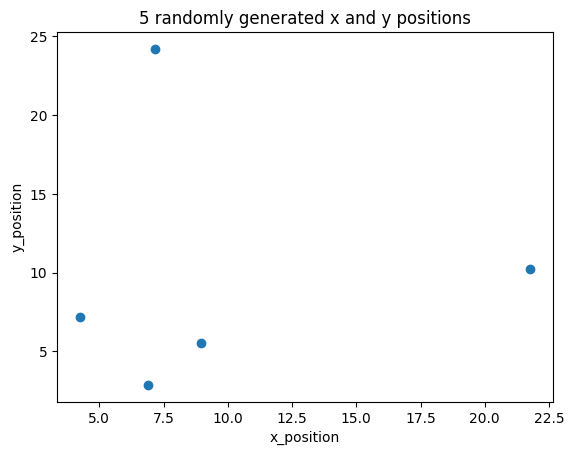

In [66]:
x_position, y_position = np.random.default_rng().uniform(low=1, high=27, size=(2, 5))
plt.clf()
plt.scatter(x_position, y_position)
plt.xlabel('x_position')
plt.ylabel('y_position')
plt.title('5 randomly generated x and y positions')
#plt.aspect_ratio('square')
plt.show()

## Generate stars for each randonly generated x and y position

In [67]:
generated_stars = []
for x_pos, y_pos in zip(x_position, y_position):
    generated_stars.append(star.create_object(x_pos, y_pos))

## Sum and plot the resulting images
With overlayed original x and y positions.

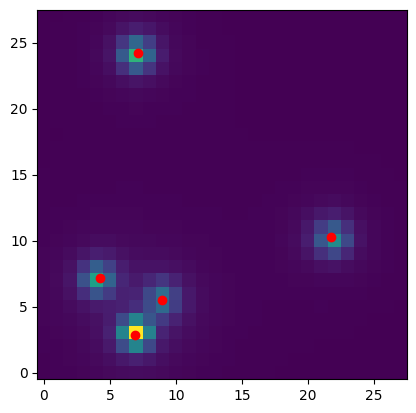

In [68]:
plt.clf()
plt.imshow(np.sum(generated_stars, axis = 0), origin = 'lower')
plt.scatter(x_position, y_position, color = 'red')
plt.show()

## Repeat the analysis with noise

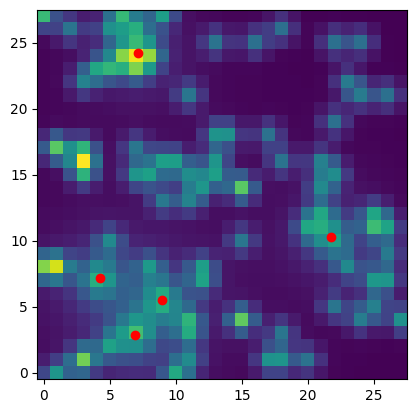

In [78]:
star_noisy = StarObject(
        image_dimensions = (28,28),
        noise = 0.1,
        radius= 0.8,
        amplitude = 5.0
    )
generated_stars_noisy = []
for x_pos, y_pos in zip(x_position, y_position):
    generated_stars_noisy.append(star_noisy.create_object(x_pos, y_pos))
plt.clf()
plt.imshow(np.sum(generated_stars_noisy, axis = 0), origin = 'lower')
plt.scatter(x_position, y_position, color = 'red')
plt.show()

In [21]:
# Now create a sky image with a combination of astro objects
sky_image = SkyImage(
    image_shape=(28,28), 
    object_noise_level=0.1
    ) # Add .2 sigma of guassian noise 


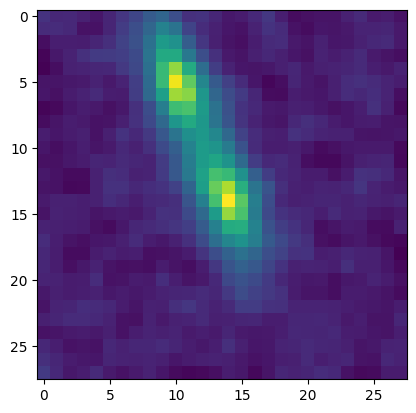

In [26]:
# A single star in a noisy image
noisy_star = sky_image.combine_objects(
    objects=["star","galaxy"],
    instance_params=[{'noise':0.2, 'radius':0.8, 'amplitude':1},
                     {'radius':5, 'amplitude':10}],
    object_params=[{'center_x':14, 'center_y':14},
                   {'center_x':10, 'center_y':5}]
)
plt.imshow(noisy_star)
